<h1>Desafio Prático 1 Módulo 1</h1>

<p></p>

<h2>Enunciado</h2>

<p>Em um cenário dinâmico de recrutamento, um experiente gerente de talentos percebe a necessidade de aprimorar as estratégias de seleção de candidatos. Com o objetivo de explorar as nuances entre experiência profissional e salários em diversos setores, o gerente tomou a iniciativa de contratar um especialista em Big Data. Em vez de utilizar uma abordagem linear, agora focaremos em técnicas de agrupamento para aprimorar a eficácia do processo de recrutamento</p>
<p>Em uma realidade onde a diversidade de perfis profissionais é a norma, nosso gerente de recrutamento enfrenta o desafio de compreender padrões complexos que vão além da linearidade. Ele busca entender não apenas a 2 correlação entre experiência e salário, mas também identificar grupos específicos de candidatos que compartilham características semelhantes.</p>
Desta forma, em vez de uma abordagem de regressão linear, o arquiteto de Big Data será encarregado de criar um modelo de clusterização, usando o algoritmo K-Means. Este modelo segmentará candidatos em grupos distintos com base em suas experiências profissionais e salários associados.</p>
<br>
Categorias Propostas:
<br>
<ul>
   <li>Iniciante: candidatos com baixo tempo em meses trabalhados. Salários iniciais e de entrada.</li>
   <li>Intermediário: candidatos com um tempo moderado em meses trabalhados. Salários correspondentes à experiência intermediária.</li>
   <li>Experiente: candidatos com extensa experiência em meses trabalhados. Salários mais elevados refletindo a experiência acumulada.</li>
</ul>
<br>
Instruções para correção de dados ausentes:
<br>
<ul>
   <li>Mediana para as variáveis numéricas.</li>
   <li>Moda para as variáveis categóricas.</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h3>1 - Importar base de dados para o relatório </h3>

In [2]:

df_estados = pd.read_csv('./dados/estados_brasileiros.csv',sep=";")
df_dadospessoais_cli = pd.read_excel('./dados/dados_pessoais.xlsx')
df_salario_cli = pd.read_csv('./dados/Experience-Salary.csv')
df_idade = pd.read_csv('./dados/idade_clientes.csv',sep=";")

<h3>2 - Preparação dos Dados </h3>

<h4>Tabela Idades</h4>

In [3]:
df_idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


<h4>Tabela dos Estados</h4>

In [4]:
df_estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [5]:
df_estados['sigla_estado'] = df_estados['sigla_estado'].str.upper()

In [6]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 996.0+ bytes


In [7]:
# Confirmação do observado
df_estados.isnull().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

<p>Vemos que a tabela possuí 27 linhas, porém na coluna do País existe apenas 25 valores. Para fazermos a confirmação visual podemos somar os valores nulos da tabela com a função isnull() concatenada com sum().</p>
<p>Após a verificação fez-se necessário o tratamento. Então, como é uma variável categórica, devemos inserir o valor que mais se repete (moda).</p>

In [8]:
df_estados['pais'].value_counts()

pais
Brasil    25
Name: count, dtype: int64

In [9]:
df_estados['pais'].fillna('Brasil',inplace=True)
df_estados.isnull().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

<h4>Tabela dos Dados Pessoais dos Clientes</h4>

In [10]:
df_dadospessoais_cli.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [11]:
df_dadospessoais_cli.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [12]:
df_dadospessoais_cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [13]:
df_dadospessoais_cli.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

Do mesmo modo da tabela dos estados devemos tratar os dados faltantes. Mas como é um valor flutuante, será inserido o valor da mediana nos dados ausentes.

In [14]:
median = df_dadospessoais_cli['peso'].median()
df_dadospessoais_cli.fillna(round(median,2),inplace=True)

In [15]:
df_dadospessoais_cli['peso']

0      102.0
1      115.0
2      115.0
3      140.0
4      130.0
       ...  
542    172.0
543    129.0
544    107.0
545    117.0
546    148.0
Name: peso, Length: 547, dtype: float64

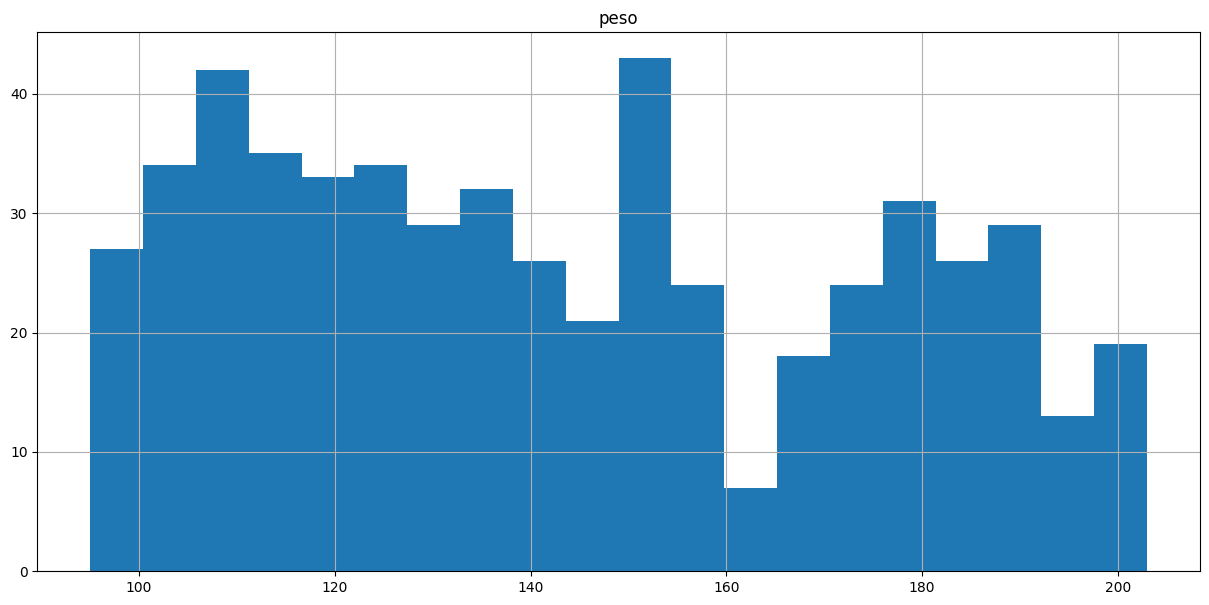

In [16]:
df_dadospessoais_cli.hist(column='peso',figsize=(15,7),bins=20)
plt.show()

<h4>Tabela dos Salários dos Clientes</h4>

In [17]:
df_salario_cli.head()

,client_ID,exp(in months),salary(in thousands)
0,1,18.290293,16.521825
1,2,17.023407,11.666234
2,3,26.343613,23.167255
3,4,19.105834,20.877145
4,5,27.742516,23.166236


In [18]:
df_salario_cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_ID             1000 non-null   int64  
 1   exp(in months)        1000 non-null   float64
 2   salary(in thousands)  1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [19]:
df_salario_cli = df_salario_cli.rename(columns={'client_ID':'id_cliente','exp(in months)':'Exp', 'salary(in thousands)': 'Salary'})
df_salario_cli

,id_cliente,Exp,Salary
0,1,18.290293,16.521825
1,2,17.023407,11.666234
2,3,26.343613,23.167255
3,4,19.105834,20.877145
4,5,27.742516,23.166236
...,...,...,...
995,996,22.161741,24.666502
996,997,32.266497,24.160270
997,998,17.039030,19.903797
998,999,25.222124,21.974413


<h4>Concatenar e Organizar Dados</h4>

In [20]:
df_merge = df_idade.merge(df_dadospessoais_cli,on="id_cliente")
df_merge = df_merge.merge(df_estados,on="id_estado")
df_merge = df_merge.merge(df_salario_cli,on="id_cliente")

In [21]:
df_merge

,id_cliente,idade,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,Exp,Salary
0,1,17,102.0,111,Masculino,23,Roraima,RR,Brasil,18.290293,16.521825
1,54,48,149.0,183,Masculino,23,Roraima,RR,Brasil,33.723395,41.540865
2,61,70,113.0,129,Feminino,23,Roraima,RR,Brasil,17.060087,12.949522
3,147,40,140.0,171,Masculino,23,Roraima,RR,Brasil,19.525438,22.227984
4,154,26,134.0,162,Feminino,23,Roraima,RR,Brasil,16.021363,15.872766
...,...,...,...,...,...,...,...,...,...,...,...
542,452,61,117.0,138,Feminino,19,Rio de Janeiro,RJ,Brasil,15.732876,8.761629
543,454,70,106.0,115,Masculino,19,Rio de Janeiro,RJ,Brasil,34.119089,39.292489
544,510,48,110.0,120,Feminino,19,Rio de Janeiro,RJ,Brasil,9.857476,18.292493
545,516,47,166.0,200,Feminino,19,Rio de Janeiro,RJ,Brasil,28.656208,37.385704


<h3>3 - Analisar Dados </h3>

In [22]:
from sklearn.cluster import KMeans

In [23]:
variaveis_cluster = ["Exp","Salary"]

In [24]:
def calc_wcss(dados_cli,num_clusters):
   wcss = []
   for k in range(1,1+num_clusters):
      kmeans = KMeans(n_clusters=k,random_state=0, init='k-means++')
      kmeans.fit(X=dados_cli)
      wcss.append(kmeans.inertia_)
   return wcss

In [25]:
wcss_clientes = calc_wcss(df_merge[variaveis_cluster],10)

C:\Users\mathe\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mathe\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mathe\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mathe\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

<h3>5 - Visualizar Dados </h3>

In [26]:
import plotly.express as px  
import plotly.offline as py
import plotly.graph_objects as go 

In [27]:
grafico_wcss = px.line(x=range(1,len(wcss_clientes)+1),
                       y=wcss_clientes)

fig = go.Figure(grafico_wcss)
fig.update_layout(title="WCSS dos clientes",
                  xaxis_title="Número de Cluesters",
                  yaxis_title="WCSS",
                  template="plotly_white")

In [28]:
kmeans_cli = KMeans(n_clusters=3,random_state=0,init='k-means++')
df_merge["cluster"] = kmeans_cli.fit_predict(df_merge[variaveis_cluster])

C:\Users\mathe\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [29]:
grafico_clustercli = px.scatter(x=df_merge["Exp"],
                                y=df_merge["Salary"],
                                color=df_merge["cluster"]
                                )

fig = go.Figure(grafico_clustercli)
fig.update_layout(title="Salário por Experiência",
                  xaxis_title="Experiência",
                  yaxis_title="Salário",
                  template="plotly_white")

In [30]:
df_merge.loc[df_merge["cluster"] == 0, "cluster"] = "Iniciante"
df_merge.loc[df_merge["cluster"] == 2, "cluster"] = "Intermediario"
df_merge.loc[df_merge["cluster"] == 1, "cluster"] = "Avancado"

C:\Users\mathe\AppData\Local\Temp\ipykernel_5224\2449942858.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Iniciante' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



In [31]:
df_merge.groupby("cluster")["colesterol"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
Avancado,152.0,167.342105,36.742906,102.0,141.75,164.0,198.25,235.0
Iniciante,147.0,170.428571,40.209383,102.0,135.00,169.0,206.50,235.0
Intermediario,248.0,172.330645,39.964199,102.0,133.75,173.5,211.00,234.0


In [35]:
df_fem_total = df_merge.query("genero == 'Feminino'")

In [38]:
df_fem_total

,id_cliente,idade,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,Exp,Salary,cluster
2,61,70,113.0,129,Feminino,23,Roraima,RR,Brasil,17.060087,12.949522,Iniciante
4,154,26,134.0,162,Feminino,23,Roraima,RR,Brasil,16.021363,15.872766,Iniciante
5,164,51,133.0,155,Feminino,23,Roraima,RR,Brasil,32.603622,36.105138,Avancado
8,204,21,125.0,148,Feminino,23,Roraima,RR,Brasil,27.261238,36.270241,Avancado
10,310,45,127.0,152,Feminino,23,Roraima,RR,Brasil,15.095317,12.707029,Iniciante
...,...,...,...,...,...,...,...,...,...,...,...,...
533,304,22,158.0,193,Feminino,19,Rio de Janeiro,RJ,Brasil,34.822677,32.466223,Avancado
536,333,27,101.0,112,Feminino,19,Rio de Janeiro,RJ,Brasil,10.781589,18.881957,Iniciante
542,452,61,117.0,138,Feminino,19,Rio de Janeiro,RJ,Brasil,15.732876,8.761629,Iniciante
544,510,48,110.0,120,Feminino,19,Rio de Janeiro,RJ,Brasil,9.857476,18.292493,Iniciante


In [42]:
grafico_fem = px.box(df_fem_total,
                     y="Salary",
                     color=df_fem_total["cluster"]
                     )

fig = go.Figure(grafico_fem)
fig.update_layout(title="Salário feminino",
                  xaxis_title="Cluster",
                  yaxis_title="Salário",
                  template="plotly_white")

In [45]:
df_fem_total.query("cluster == 'Intermediario'").count()

id_cliente      108
idade           108
peso            108
colesterol      108
genero          108
id_estado       108
estado          108
sigla_estado    108
pais            108
Exp             108
Salary          108
cluster         108
dtype: int64

In [32]:
df_merge.groupby("cluster")["estado"].describe()

,count,unique,top,freq
cluster,,,,
Avancado,152,27,Ceará,12
Iniciante,147,27,Rio de Janeiro,10
Intermediario,248,27,Distrito Federal,14


In [67]:
df_merge.groupby("estado")["colesterol"].describe()["mean"].sort_values()

estado
Goiás                  154.086957
Acre                   162.500000
Rio Grande do Norte    163.208333
Bahia                  164.444444
Roraima                164.777778
Amazonas               164.880000
Maranhão               164.954545
Rio de Janeiro         165.304348
Paraná                 165.888889
Piauí                  166.173913
Mato Grosso do Sul     167.818182
Minas Gerais           168.518519
Amapá                  169.761905
Paraíba                169.875000
Sergipe                170.473684
Rondônia               170.900000
Ceará                  171.400000
Santa Catarina         172.727273
Tocantins              174.263158
Alagoas                174.666667
Distrito Federal       175.954545
São Paulo              176.666667
Pará                   178.952381
Espírito Santo         179.111111
Pernambuco             180.176471
Rio Grande do Sul      185.380952
Mato Grosso            186.333333
Name: mean, dtype: float64

array([[<Axes: title={'center': 'peso'}>]], dtype=object)

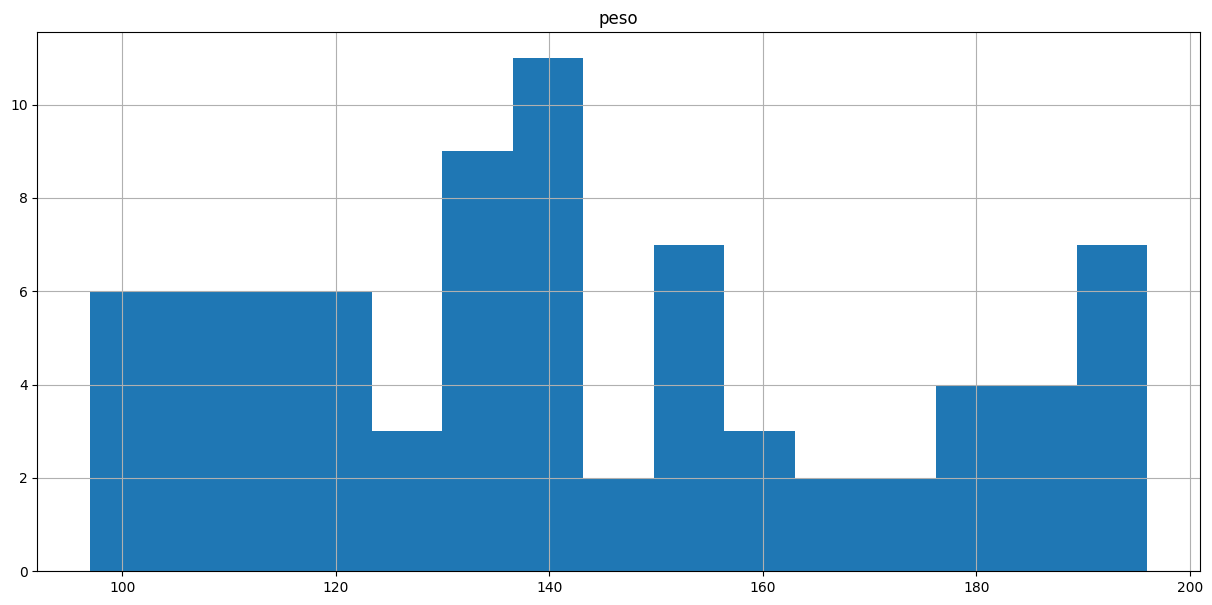

In [72]:
df_fem_total.loc[df_fem_total["cluster"] == "Iniciante"].hist(column='peso',figsize=(15,7),bins=15)